<a href="https://colab.research.google.com/github/Bhageerath123/Wine-quality-Prediction-Using-Neural-Networks/blob/main/Wine_quality_Prediction_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/wine_training.csv')
test=pd.read_csv('/content/drive/MyDrive/wine_testing.csv')


In [ ]:
train.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.47         0.46  ...       0.63     10.5        5
1            7.4              0.74         0.07  ...       0.48     10.0        5
2           14.3              0.31         0.74  ...       0.79      8.4        6
3            7.5              0.51         0.02  ...       0.54     10.5        6
4            9.1              0.52         0.33  ...       0.60      9.3        5

[5 rows x 12 columns]

In [ ]:
test.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            6.1             0.530         0.08  ...  3.60       0.68     10.3
1            6.2             0.390         0.43  ...  3.45       0.87     11.2
2            9.3             0.430         0.44  ...  3.28       0.55      9.5
3            7.0             0.735         0.05  ...  3.39       0.57      9.8
4           10.7             0.900         0.34  ...  3.22       0.68      9.3

[5 rows x 11 columns]

In [ ]:
print(train.shape)

(1280, 12)


In [ ]:
print(test.shape)

(320, 11)


In [ ]:
print(train.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
print(test.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


Checking for datatypes of attributes/features

In [ ]:
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
test.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [ ]:
import numpy as np

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib
import seaborn as sns

Checking for nan values

In [ ]:
np.any(np.isnan(train))

False

In [ ]:
np.any(np.isnan(test))

False

Data Visualization

In [ ]:
import matplotlib.pyplot as plt

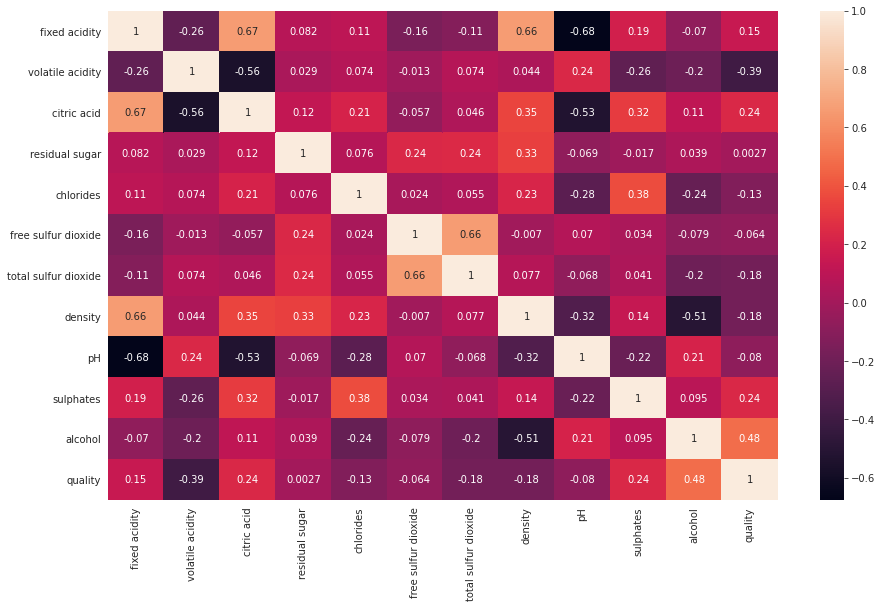

In [ ]:
plt.subplots(figsize=(15,9))
sns.heatmap(train.corr(), annot=True)

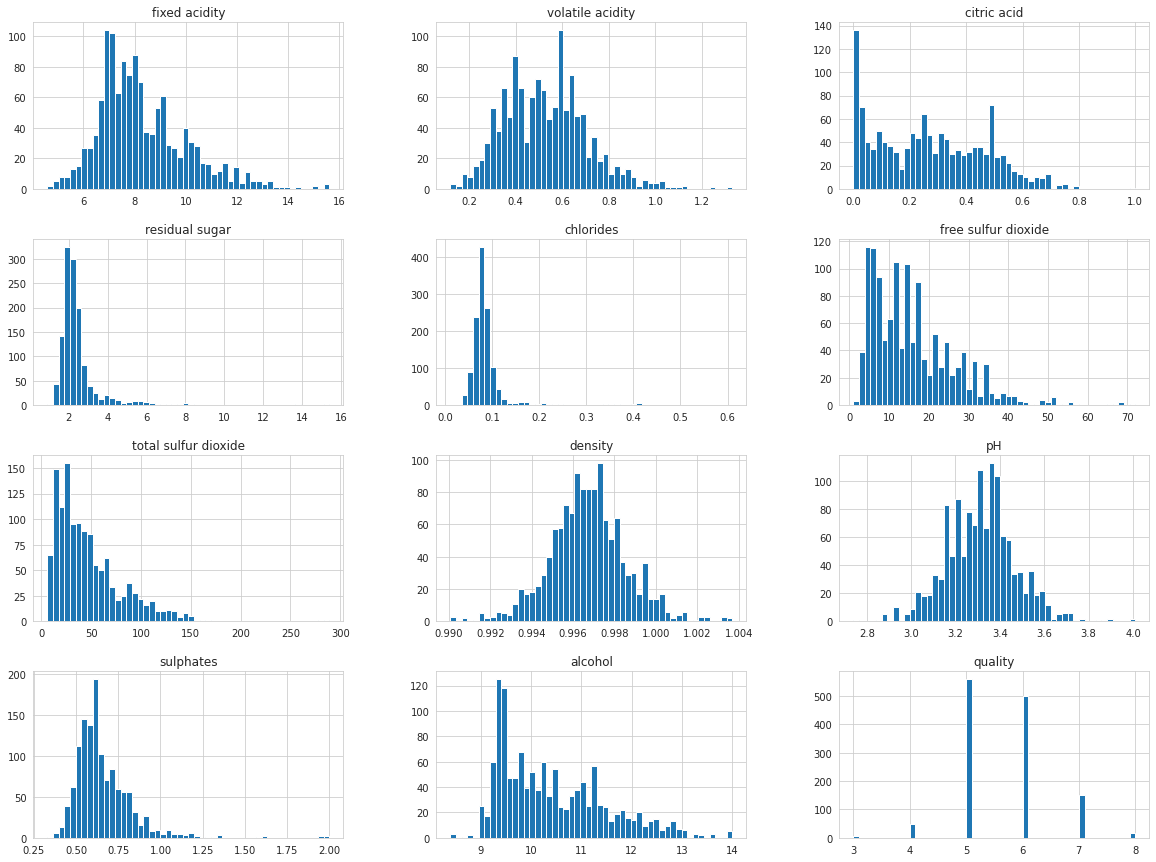

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


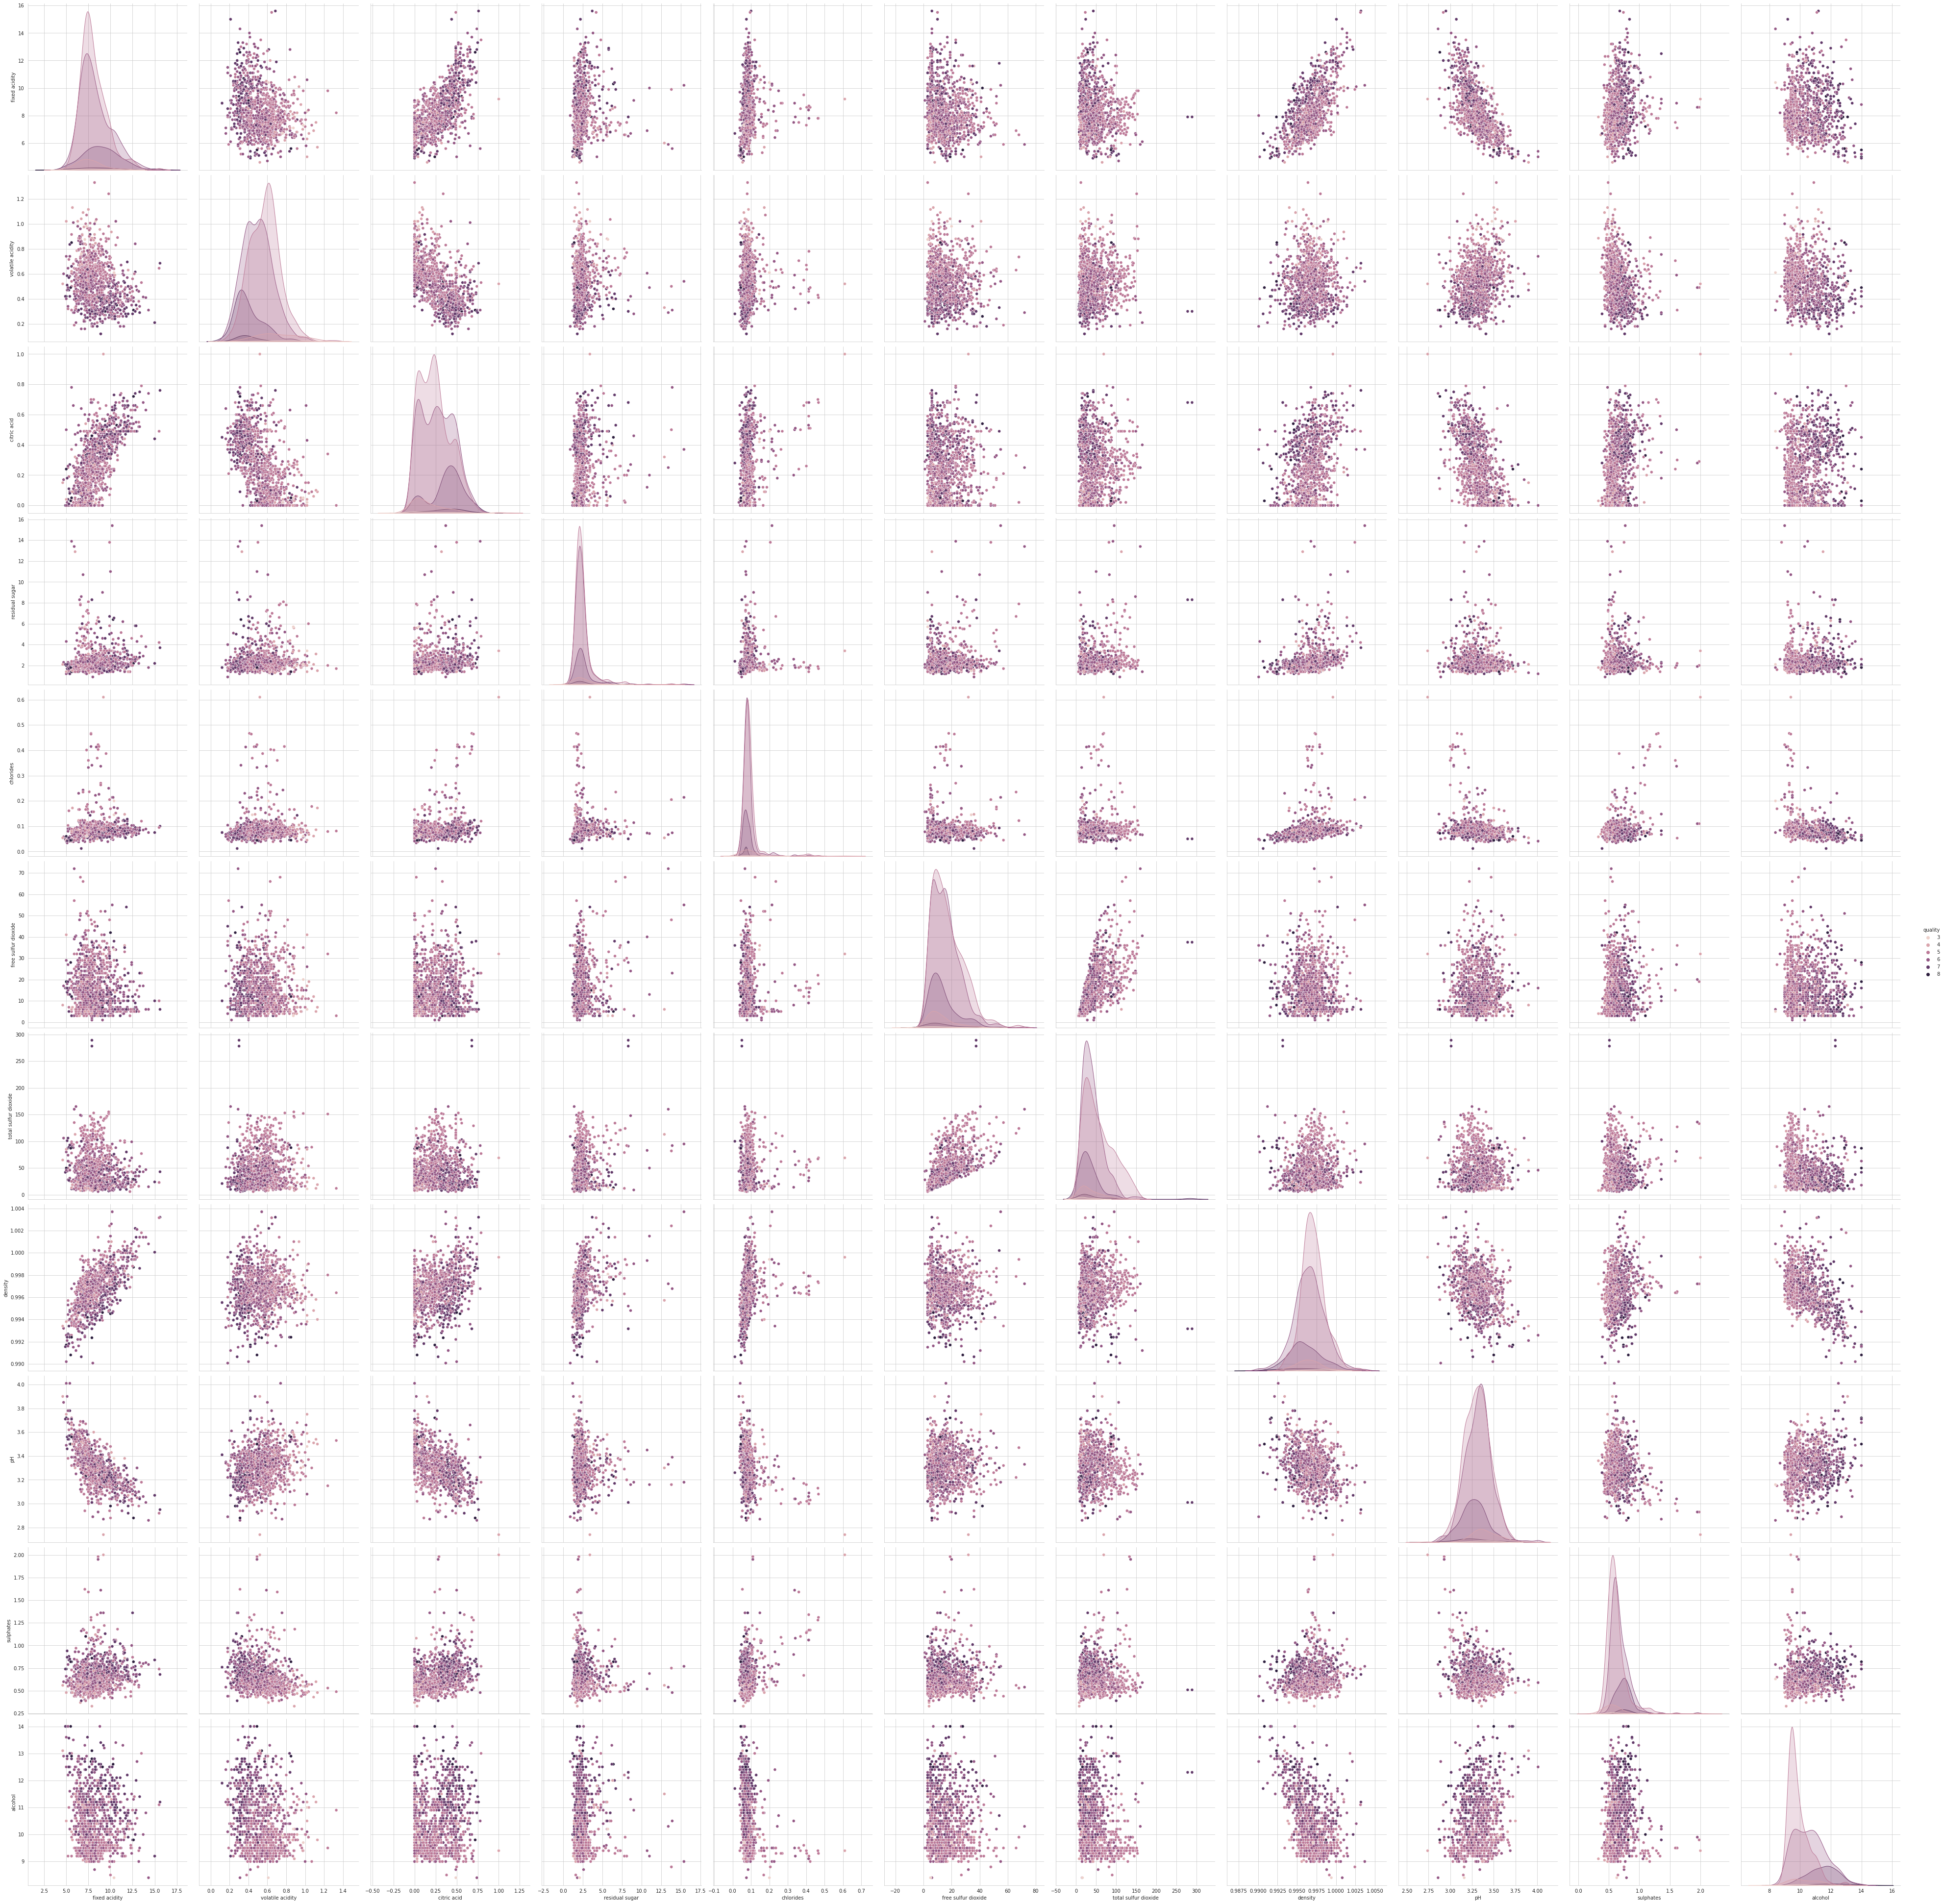

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(train, hue="quality", size=5);
plt.show()

In [ ]:
correlations = train.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.483252
sulphates               0.238595
citric acid             0.236725
fixed acidity           0.145761
residual sugar          0.002712
free sulfur dioxide    -0.064211
pH                     -0.079590
chlorides              -0.129443
total sulfur dioxide   -0.179160
density                -0.181762
volatile acidity       -0.392837
Name: quality, dtype: float64


In [ ]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.483252
sulphates           0.238595
citric acid         0.236725
volatile acidity   -0.392837
Name: quality, dtype: float64

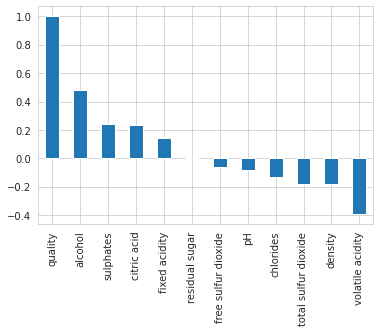

In [ ]:
correlations.plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    559
6    500
7    151
4     47
8     17
3      6
Name: quality, dtype: int64

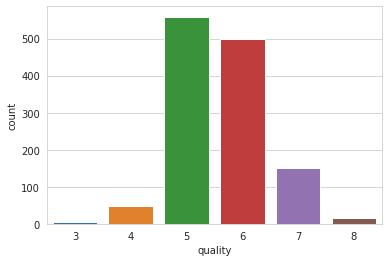

In [ ]:
sns.countplot(train['quality'])
train['quality'].value_counts()

In [ ]:
X=train.drop('quality',axis=1)

In [ ]:
y=train['quality']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.metrics import mean_squared_error

K-fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
import numpy as np

In [ ]:
from keras import losses 
from keras import optimizers 
from keras import metrics 

In [ ]:
st.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X=pd.DataFrame(st.transform(X))


In [ ]:
def create_model(optimizer='adam',learn_rate='learn_rate',momentum='momentum',activation='activation',dropout_rate=0.0, weight_constraint=0,neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(18,input_dim=11,activation='relu'))
    #hidden layer
    model.add(Dense(16, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [ ]:
import numpy as np

10 fold cross-validation

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

In [ ]:
mse_scores = -scores
print(mse_scores)

[0.42675681 0.55136694 0.44848895 0.46310321 0.54396124 0.41473064
 0.40859673 0.45097703 0.50448859 0.331051  ]


In [ ]:
print(mse_scores.mean())

0.45435211386349617


In [ ]:
correlations = train.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.483252
sulphates               0.238595
citric acid             0.236725
fixed acidity           0.145761
residual sugar          0.002712
free sulfur dioxide    -0.064211
pH                     -0.079590
chlorides              -0.129443
total sulfur dioxide   -0.179160
density                -0.181762
volatile acidity       -0.392837
Name: quality, dtype: float64


In [ ]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.483252
sulphates           0.238595
citric acid         0.236725
volatile acidity   -0.392837
Name: quality, dtype: float64

We train Model only with most important features

In [ ]:
X = train.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','quality'], axis=1)
y = train['quality']

In [ ]:
st.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X=pd.DataFrame(st.transform(X))


In [ ]:
X.shape

(1280, 4)

In [ ]:
def create_model(optimizer='adam',learn_rate='learn_rate',momentum='momentum',activation='activation',dropout_rate=0.0, weight_constraint=0,neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(18,input_dim=4,activation='relu'))
    #hidden layer
    model.add(Dense(16, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

In [ ]:
mse_scores = -scores
print(mse_scores)

[0.42474086 0.44929021 0.44200257 0.42397946 0.51977934 0.4632314
 0.3853073  0.35551727 0.50221136 0.35306213]


In [ ]:
print(mse_scores.mean())

0.4319121890709415


Hyper Parameters Tuning

Tuning for Best Epochs and Batch Size

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=10)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.428306 using {'batch_size': 80, 'epochs': 100}
-0.474518 (0.063022) with: {'batch_size': 10, 'epochs': 10}
-0.441269 (0.049442) with: {'batch_size': 10, 'epochs': 50}
-0.441982 (0.057453) with: {'batch_size': 10, 'epochs': 100}
-0.613910 (0.114814) with: {'batch_size': 20, 'epochs': 10}
-0.441630 (0.049975) with: {'batch_size': 20, 'epochs': 50}
-0.431760 (0.064524) with: {'batch_size': 20, 'epochs': 100}
-1.142159 (0.290603) with: {'batch_size': 40, 'epochs': 10}
-0.445021 (0.087668) with: {'batch_size': 40, 'epochs': 50}
-0.440507 (0.065256) with: {'batch_size': 40, 'epochs': 100}
-1.446163 (0.145287) with: {'batch_size': 60, 'epochs': 10}
-0.452700 (0.077615) with: {'batch_size': 60, 'epochs': 50}
-0.433442 (0.071594) with: {'batch_size': 60, 'epochs': 100}
-1.992397 (0.416722) with: {'batch_size': 80, 'epochs': 10}
-0.460701 (0.089310) with: {'batch_size': 80, 'epochs': 50}
-0.428306 (0.056444) with: {'batch_size': 80, 'epochs': 100}
-2.390002 (0.452575) with: {'batch_size

Tuning for Learning rate and Momentum

In [ ]:
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.416574 using {'learn_rate': 0.1, 'momentum': 0.2}
-0.553352 (0.327295) with: {'learn_rate': 0.001, 'momentum': 0.0}
-0.544945 (0.332790) with: {'learn_rate': 0.001, 'momentum': 0.2}
-0.567882 (0.416560) with: {'learn_rate': 0.001, 'momentum': 0.4}
-0.580796 (0.444089) with: {'learn_rate': 0.001, 'momentum': 0.6}
-0.434035 (0.051396) with: {'learn_rate': 0.001, 'momentum': 0.8}
-0.436321 (0.058986) with: {'learn_rate': 0.001, 'momentum': 0.9}
-0.431428 (0.058726) with: {'learn_rate': 0.01, 'momentum': 0.0}
-0.567600 (0.387419) with: {'learn_rate': 0.01, 'momentum': 0.2}
-0.434848 (0.051990) with: {'learn_rate': 0.01, 'momentum': 0.4}
-0.434195 (0.060951) with: {'learn_rate': 0.01, 'momentum': 0.6}
-0.442062 (0.054638) with: {'learn_rate': 0.01, 'momentum': 0.8}
-0.575550 (0.410741) with: {'learn_rate': 0.01, 'momentum': 0.9}
-0.432143 (0.050670) with: {'learn_rate': 0.1, 'momentum': 0.0}
-0.416574 (0.056339) with: {'learn_rate': 0.1, 'momentum': 0.2}
-0.683682 (0.461837) with: 

Tuning For Activation Function

In [ ]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.424566 using {'activation': 'hard_sigmoid'}
-0.426678 (0.048989) with: {'activation': 'softmax'}
-0.552467 (0.331356) with: {'activation': 'softplus'}
-0.562715 (0.432687) with: {'activation': 'softsign'}
-0.432919 (0.049672) with: {'activation': 'relu'}
-0.427590 (0.047842) with: {'activation': 'tanh'}
-0.555188 (0.383879) with: {'activation': 'sigmoid'}
-0.424566 (0.051851) with: {'activation': 'hard_sigmoid'}
-0.547684 (0.329647) with: {'activation': 'linear'}


Tuning for Weight_constraint and Drop_out rate

In [ ]:
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.420422 using {'dropout_rate': 0.7, 'weight_constraint': 3}
-0.429845 (0.057992) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
-0.431724 (0.054762) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
-0.540093 (0.302808) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
-0.704412 (0.571661) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
-0.556705 (0.431425) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
-0.421327 (0.048669) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
-0.423468 (0.048732) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
-0.421629 (0.051678) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
-0.556353 (0.357216) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
-0.434102 (0.047728) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
-0.795390 (0.573616) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
-0.571995 (0.428587) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
-0.544586 (0.332653) with: {'dropout_rate': 0.2, 'weight

Tuning for Hidden neurons

In [ ]:
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.430804 using {'neurons': 10}
-0.546483 (0.352400) with: {'neurons': 1}
-0.435922 (0.056522) with: {'neurons': 5}
-0.430804 (0.048702) with: {'neurons': 10}
-0.675924 (0.484507) with: {'neurons': 15}
-0.441613 (0.047808) with: {'neurons': 20}
-0.697516 (0.562390) with: {'neurons': 25}
-0.554995 (0.339987) with: {'neurons': 30}


Tuning for Optimizer

In [ ]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.424175 using {'optimizer': 'Nadam'}
-0.460990 (0.080892) with: {'optimizer': 'SGD'}
-0.429127 (0.045697) with: {'optimizer': 'RMSprop'}
-16.623383 (7.439296) with: {'optimizer': 'Adagrad'}
-30.022585 (3.707396) with: {'optimizer': 'Adadelta'}
-0.563981 (0.414879) with: {'optimizer': 'Adam'}
-0.578629 (0.291279) with: {'optimizer': 'Adamax'}
-0.424175 (0.053742) with: {'optimizer': 'Nadam'}


In [ ]:
from keras.layers import Dropout

In [ ]:
from keras.optimizers import RMSprop

Now we try to create model with the tuned hyper paranters

In [ ]:
from keras.optimizers import Nadam

In [ ]:
from tensorflow.keras.constraints import max_norm

In [ ]:
X = train.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','quality'], axis=1)
y = train['quality']

In [ ]:
st.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X=pd.DataFrame(st.transform(X))


In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(18,input_dim=4,activation='relu'))
    #hidden layer
    #model.add(Dense(16, activation='relu'))
    #model.add(Dense(14, activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mean_squared_error'])
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=40, batch_size=10, verbose=0)

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

In [ ]:
mse_scores = -scores
print(mse_scores)

[0.41337323 0.42364579 0.45932848 0.39620412 0.48583397 0.44236429
 0.35797101 0.35709745 0.49672395 0.36865154]


In [ ]:
print(mse_scores.mean())

0.4201193834633369


In [ ]:
X = train.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','quality'], axis=1)
y = train['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
st.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train=pd.DataFrame(st.transform(X_train))
X_test=pd.DataFrame(st.transform(X_test))

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=30)

In [ ]:
y_pred=model.predict(X_test)

MSE is 0.41

In [ ]:
mean_squared_error(y_test,y_pred)

0.4126239568344883

In [ ]:
test_data = test.drop(['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH'], axis=1)


In [ ]:
test_data.shape

(320, 4)

In [ ]:
st=StandardScaler()

In [ ]:
st.fit(test_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
test_data=pd.DataFrame(st.transform(test_data))


In [ ]:
test_labels=model.predict(test_data)

In [ ]:
import pandas as pd


In [ ]:
test_result=pd.DataFrame(test_labels)

In [ ]:
print(test_result)

            0
0    5.379671
1    6.182380
2    5.334496
3    5.087163
4    4.910241
..        ...
315  5.014873
316  5.615170
317  6.209024
318  6.079008
319  5.509226

[320 rows x 1 columns]


In [ ]:
test_result.to_csv('/content/drive/MyDrive/Test-Quality.csv')
